<img src="https://github.com/TUIlmenauAMS/MRSP_Tutorials/raw/master/seminars/images/msp_logo.png" alt="msp_logo" width="700" >

# Seminar 01: Filter Design using Remez Algorithm

In [4]:
#@title
%%html
<iframe src="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.remez.html" height="400" width="900" title="SciPy Remez"></iframe>

In [5]:
#@title
%%html
<iframe src="https://en.wikipedia.org/wiki/Remez_algorithm" height="400" width="900" title="Remez"></iframe>


In [6]:
#@title
%%html
<iframe src="https://ieeexplore.ieee.org/document/1162525" height="400" width="900" title="Iframe Example"></iframe>

## SciPy Remez Example

In [18]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

In [15]:
def plot_response(fs, w, h, title):
    "Utility function to plot response functions"
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)))
    ax.set_ylim(-40, 5)
    ax.set_xlim(0, 0.5*fs)
    ax.grid(True)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Gain (dB)')
    ax.set_title(title)

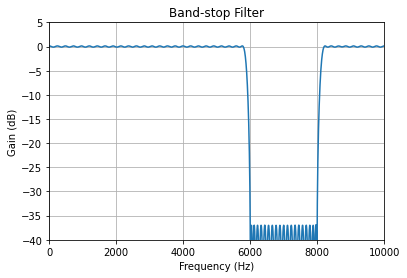

In [17]:
fs = 20000.0         # Sample rate, Hz
band = [6000, 8000]  # Desired stop band, Hz
trans_width = 200    # Width of transition from pass band to stop band, Hz
numtaps = 175        # Size of the FIR filter.
edges = [0, band[0] - trans_width, band[0], band[1], band[1] + trans_width, 0.5*fs]
taps = signal.remez(numtaps, edges, [1, 0, 1], Hz=fs)
w, h = signal.freqz(taps, [1], worN=2000)
plot_response(fs, w, h, "Band-stop Filter")